<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/4.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B8%CC%86%D1%88%D0%B8%D1%85%20%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B8%CC%86/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%966_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_K_%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №6. Метод K-ближайших соседей

# Базовый алгоритм KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [101]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#### 1.2. Обучите модель KNN

In [103]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### 1.3. Проверьте качество работы модели

In [104]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели при K=3: {accuracy:.2f}")

Точность модели при K=3: 0.97


#### 1.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

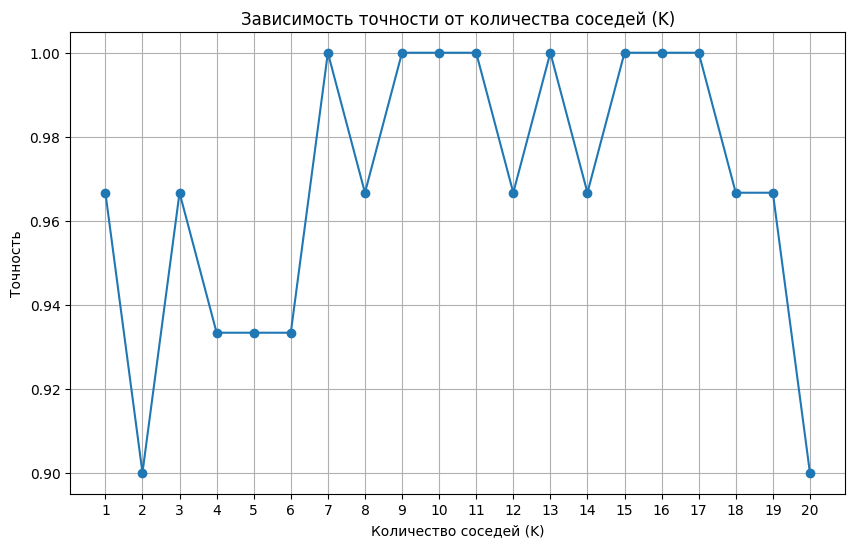

Оптимальное значение K: 7, точность: 1.0


In [105]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Зависимость точности от количества соседей (K)")
plt.xlabel("Количество соседей (K)")
plt.ylabel("Точность")
plt.xticks(k_values)
plt.grid()
plt.show()

optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"Оптимальное значение K: {optimal_k}, точность: {max(accuracies)}")

### 2. KNN рукописный

#### 2.1. Возьмите два случайных тестовых объектов

In [106]:
import numpy as np
y_test = pd.Series(y_test, index=X_test.index)

random_indices = np.random.choice(X_test.index, size=2, replace=False)
test_objects = X_test.loc[random_indices]
true_labels = y_test.loc[random_indices]

print("Случайно выбранные тестовые объекты:")
print(test_objects)
print(f"Их настоящие метки классов: {true_labels.tolist()}")


Случайно выбранные тестовые объекты:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
136                6.3               3.4                5.6               2.4
147                6.5               3.0                5.2               2.0
Их настоящие метки классов: [2, 2]


#### 2.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [107]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

distances = []
for test_object in test_objects.values:
    dists = [euclidean_distance(test_object, train_object) for train_object in X_train.values]
    distances.append(dists)

print("Расстояния до всех объектов из обучающей выборки рассчитаны.")



Расстояния до всех объектов из обучающей выборки рассчитаны.


#### 2.3. Выберите топ $k$ соседей для каждого объекта

In [108]:
k = 3

neighbors = []
for dists in distances:
    nearest_indices = np.argsort(dists)[:k]
    neighbors.append(nearest_indices)

print(f"Индексы ближайших {k} соседей для каждого объекта:")
print(neighbors)



Индексы ближайших 3 соседей для каждого объекта:
[array([104,   3, 102]), array([57, 61, 21])]


#### 2.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [109]:
predictions = []
for i, nearest_indices in enumerate(neighbors):
    neighbor_labels = y_train[nearest_indices]  # Работаем с numpy массивом
    prediction = np.bincount(neighbor_labels).argmax()  # Метка класса с наибольшей частотой
    predictions.append(prediction)

print(f"Финальные предсказания для тестовых объектов: {predictions}")


Финальные предсказания для тестовых объектов: [np.int64(2), np.int64(2)]


#### 2.5. Сравните с настоящими целевыми значениями этих двух объектов

In [110]:
for i, (pred, true) in enumerate(zip(predictions, true_labels)):
    print(f"Тестовый объект {i + 1}:")
    print(f"  Настоящая метка: {true}")
    print(f"  Предсказанная метка: {pred}")
    print(f"  {'Совпадает' if pred == true else 'Не совпадает'}")


Тестовый объект 1:
  Настоящая метка: 2
  Предсказанная метка: 2
  Совпадает
Тестовый объект 2:
  Настоящая метка: 2
  Предсказанная метка: 2
  Совпадает


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [111]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### KNN из sklearn

#### 3.1. Разбейте данные на обучение и тест

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер обучающего набора: {X_train.shape}")
print(f"Размер тестового набора: {X_test.shape}")



Размер обучающего набора: (14448, 8)
Размер тестового набора: (6192, 8)


Затем нормализуйте данные:

In [113]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train[X_train.columns]), columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test[X_train.columns]), columns=X_train.columns)


#### 3.2. Обучите модель KNN


In [114]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

#### 3.3. Проверьте качество работы модели

In [115]:
from sklearn.metrics import mean_squared_error

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse}")

Среднеквадратичная ошибка (MSE): 0.4015197569508185


#### 3.4. Поэкспериментируйте с количеством соседей

1. Обучите модели с разным кол-вом соседей
2. Посчитайте метрику на тестовой выборке
3. Соберите данные в таблицу/график для наглядности
4. Выберите самое оптимальное значение $k$

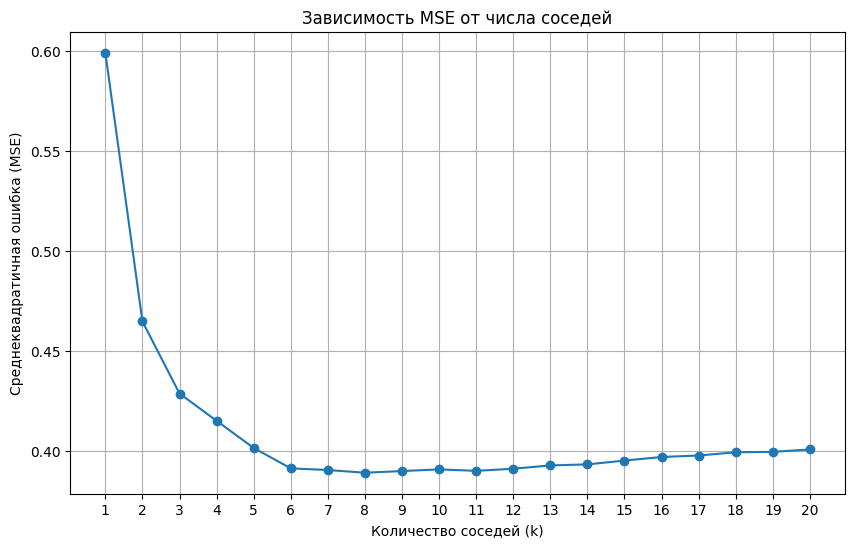

Оптимальное количество соседей: 8, MSE: 0.38911639878164667


In [116]:
neighbors = range(1, 21)
mses = []

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(neighbors, mses, marker='o')
plt.title('Зависимость MSE от числа соседей')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

optimal_k = neighbors[mses.index(min(mses))]
print(f"Оптимальное количество соседей: {optimal_k}, MSE: {min(mses)}")


### 4. KNN рукописный

#### 4.1. Возьмите два случайных тестовых объектов

In [117]:
random_indices = np.random.choice(X_test.index, size=2, replace=False)
test_objects = X_test.loc[random_indices]
true_labels = y_test[random_indices]

print("Случайно выбранные тестовые объекты:")
print(test_objects)
print(f"Их настоящие метки цен: {true_labels.tolist()}")


Случайно выбранные тестовые объекты:
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
5812  0.114750  0.745098  0.020476   0.030614    0.040948  0.002472  0.557447   
2172  0.057958  0.823529  0.023480   0.030806    0.033914  0.001946  0.154255   

      Longitude  
5812   0.210159  
2172   0.605578  
Их настоящие метки цен: [1.055, 1.108]


#### 4.2. Посчитайте для каждого расстояния до всех объектов из обучения

In [118]:
from sklearn.metrics import pairwise_distances

distances = pairwise_distances(test_objects, X_train, metric='euclidean')

print(f"Расстояния от тестовых объектов до объектов обучающей выборки:\n{distances}")


Расстояния от тестовых объектов до объектов обучающей выборки:
[[0.60840019 0.82907233 0.51626465 ... 0.56050533 0.5322369  0.25916718]
 [0.2499983  0.49480924 0.46550665 ... 0.17689205 0.82051263 0.60966882]]


#### 4.3. Выберите топ $k$ соседей для каждого объекта

In [119]:
K = 5
top_k_neighbors = np.argsort(distances, axis=1)[:, :K]

print(f"Индексы топ {K} ближайших соседей для каждого тестового объекта:\n{top_k_neighbors}")


Индексы топ 5 ближайших соседей для каждого тестового объекта:
[[12003  5944  3888  7212  2435]
 [  677 12243 12944  2821  8127]]


#### 4.4. Выведите финальное предсказание для двух объектов основываясь на соседях

In [120]:
neighbor_labels = [y_train[neighbors] for neighbors in top_k_neighbors]

predictions = [np.mean(labels) for labels in neighbor_labels]

print(f"Предсказания для двух тестовых объектов: {predictions}")


Предсказания для двух тестовых объектов: [np.float64(1.2738), np.float64(1.2692)]


#### 4.5. Сравните с настоящими целевыми значениями этих двух объектов

In [121]:
predictions_array = np.array(predictions)
true_labels_array = np.array(true_labels)

deviation = np.abs(predictions_array - true_labels_array)

print(f"Отклонение предсказаний от истинных значений: {deviation}")


Отклонение предсказаний от истинных значений: [0.2188 0.1612]


Предсказания отклоняются от истины, но не так сильно, они довольно близки.

# Weighted KNN

## KNN для классификации

### Получение данных

Будем работать с набором данным `iris` из `sklearn`.

In [122]:
from sklearn.datasets import load_iris
import pandas as pd


data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [123]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Выберите только 0 и 3 признак (sepal length (cm) и petal width (cm))

In [124]:
X_selected = X.iloc[:, [0, 3]]

### Визуализируйте ваши данные на графике

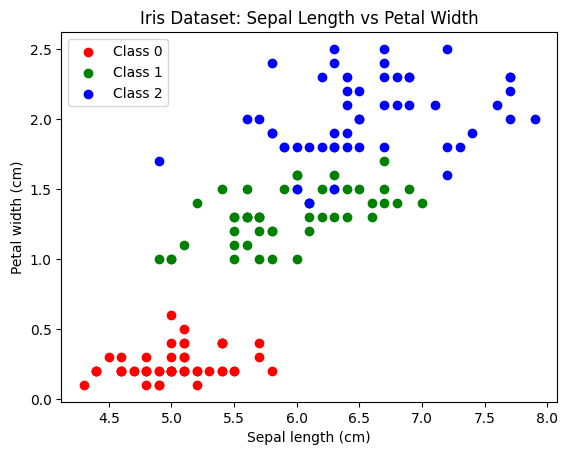

In [125]:
plt.scatter(X_selected[y == 0].iloc[:, 0], X_selected[y == 0].iloc[:, 1], color='red', label='Class 0')
plt.scatter(X_selected[y == 1].iloc[:, 0], X_selected[y == 1].iloc[:, 1], color='green', label='Class 1')
plt.scatter(X_selected[y == 2].iloc[:, 0], X_selected[y == 2].iloc[:, 1], color='blue', label='Class 2')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title('Iris Dataset: Sepal Length vs Petal Width')
plt.show()

### 1. KNN из sklearn

#### 1.1. Разбейте данные на обучение и тест

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


#### 1.2. Обучите модель KNN на 50 соседях

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)



#### 1.3. Проверьте качество работы модели

In [128]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

Точность модели: 0.9333333333333333


#### 1.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [129]:
import numpy as np

random_index = np.random.choice(len(X_test))
test_object = X_test.iloc[random_index]

distances, indices = knn.kneighbors([test_object])

print(f"Расстояния до ближайших соседей: {distances}")
print(f"Индексы ближайших соседей: {indices}")


Расстояния до ближайших соседей: [[0.14142136 0.2        0.2        0.2236068  0.28284271 0.3
  0.3        0.31622777 0.31622777 0.31622777 0.31622777 0.36055513
  0.4        0.41231056 0.42426407 0.5        0.5        0.5
  0.5        0.53851648 0.58309519 0.58309519 0.6        0.60827625
  0.60827625 0.60827625 0.63245553 0.63245553 0.64031242 0.64031242
  0.67082039 0.67082039 0.7        0.70710678 0.72111026 0.72801099
  0.76157731 0.76157731 0.76157731 0.76157731 0.78102497 0.78102497
  0.8        0.80622577 0.80622577 0.82462113 0.82462113 0.85440037
  0.85440037 0.89442719]]
Индексы ближайших соседей: [[ 87  83  50   5  46  97  17 109  74  30 107  81  76  77 103 100  85  54
   42  61 113  59   6  80  16  73  10  43  11  62  12  56 119  40  68  18
    2  63  90  79  86 105 111 110 112  92  39  69 115  19]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 1.5. Выберите топ  k  соседей


In [130]:
top_k_neighbors = indices[0]
print(f"Топ-50 ближайших соседей: {top_k_neighbors}")

Топ-50 ближайших соседей: [ 87  83  50   5  46  97  17 109  74  30 107  81  76  77 103 100  85  54
  42  61 113  59   6  80  16  73  10  43  11  62  12  56 119  40  68  18
   2  63  90  79  86 105 111 110 112  92  39  69 115  19]


#### 1.6. Выведите финальное предсказание для этого объекта

In [131]:
neighbor_labels = y_train[top_k_neighbors]

# класс с наибольшей частотой
final_prediction = np.bincount(neighbor_labels).argmax()
print(f"Финальное предсказание для тестового объекта: {final_prediction}")

Финальное предсказание для тестового объекта: 2


#### 1.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [132]:
true_label = y_test[random_index]
print(f"Настоящее значение: {true_label}")

sklearn_prediction = knn.predict([test_object])[0]
print(f"Предсказание модели sklearn: {sklearn_prediction}")


Настоящее значение: 2
Предсказание модели sklearn: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 1.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

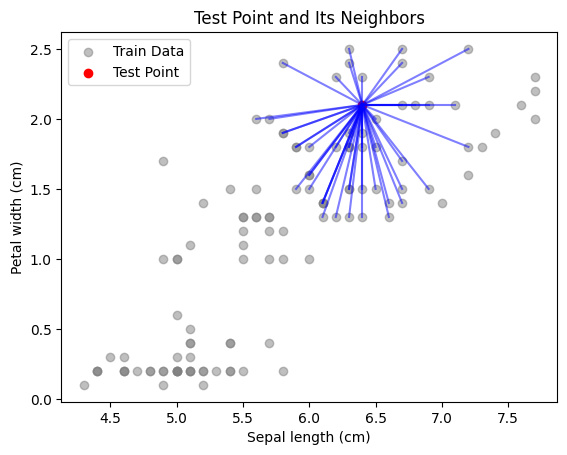

In [133]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='gray', label='Train Data', alpha=0.5)

plt.scatter(test_object.iloc[0], test_object.iloc[1], color='red', label='Test Point')

for neighbor in X_train.iloc[top_k_neighbors, :].values:
    plt.plot([test_object.iloc[0], neighbor[0]], [test_object.iloc[1], neighbor[1]], color='blue', alpha=0.5)

plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.title('Test Point and Its Neighbors')
plt.show()


### 2. Weighted KNN

#### 2.1. Обучите модель "взвешенный KNN" по дистанции

In [134]:
knn_weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_weighted.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

#### 2.2. Проверьте качество работы модели


In [135]:
y_pred_weighted = knn_weighted.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_weighted)
print(f"Точность модели с взвешенными соседями: {accuracy}")

Точность модели с взвешенными соседями: 0.9333333333333333


#### 2.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [136]:
random_idx = np.random.randint(0, len(X_test))
test_object = X_test.iloc[random_idx]

distances, indices = knn_weighted.kneighbors([test_object])

print(f"Расстояния до всех объектов для тестового объекта: {distances}")

Расстояния до всех объектов для тестового объекта: [[0.1        0.1        0.1        0.14142136 0.14142136]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 2.4. Выберите топ  k  соседей


In [137]:
top_k_neighbors = indices[0]
print(f"Индексы ближайших соседей: {top_k_neighbors}")


Индексы ближайших соседей: [28 98 27 33 71]


#### 2.5. Рассчитайте вес для каждого соседа

In [138]:
weights = 1 / distances[0]
print(f"Веса для каждого соседа: {weights}")

Веса для каждого соседа: [10.         10.         10.          7.07106781  7.07106781]


#### 2.6. Выведите финальное предсказание для этого объекта

In [139]:
final_prediction_weighted = knn_weighted.predict([test_object])
print(f"Финальное предсказание для тестового объекта (взвешенное): {final_prediction_weighted[0]}")


Финальное предсказание для тестового объекта (взвешенное): 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 2.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [140]:
true_label = y_test[random_idx]
print(f"Настоящее значение для тестового объекта: {true_label}")


Настоящее значение для тестового объекта: 0


In [141]:
print(f"Предсказание модели: {final_prediction_weighted[0]}")

Предсказание модели: 0


#### 2.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

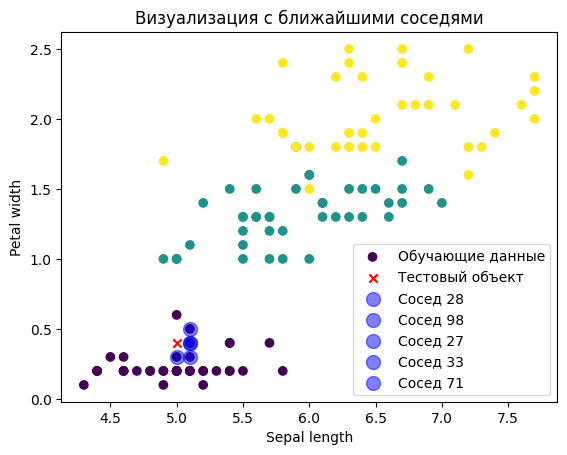

In [142]:
import matplotlib.pyplot as plt

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis', label='Обучающие данные')

plt.scatter(test_object.iloc[0], test_object.iloc[1], color='red', marker='x', label='Тестовый объект')

for idx in top_k_neighbors:
    plt.scatter(X_train.iloc[idx, 0], X_train.iloc[idx, 1], color='blue', marker='o', s=100, alpha=0.5, label=f'Сосед {idx}')

plt.xlabel('Sepal length')
plt.ylabel('Petal width')
plt.legend()
plt.title("Визуализация с ближайшими соседями")
plt.show()


### 3. Еще одна задача классификации

### Получение данных

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

In [143]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data = fetch_olivetti_faces(shuffle=True, random_state=9)

X = pd.DataFrame(data['data'])
y = data['target']

X.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


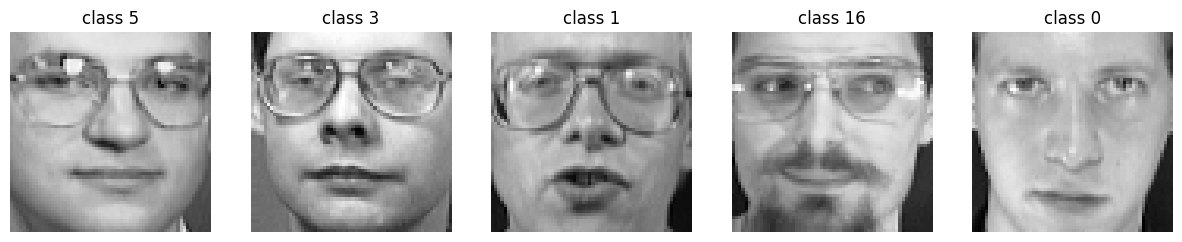

In [144]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(X.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [145]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

### 3.1. KNN из sklearn

#### 3.1.1. Разбейте данные на обучение и тест

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(320, 4096) (80, 4096)


#### 3.1.2. Обучите модель KNN на 50 соседях

In [147]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50)

#### 3.1.3. Проверьте качество работы модели


In [148]:
accuracy = knn.score(X_test, y_test)

print(accuracy)



0.3


### 3.2. Weighted KNN

#### 3.2.1. Обучите модель взвешенный KNN по дистанции

In [149]:
from sklearn.neighbors import KNeighborsClassifier

knn_weighted = KNeighborsClassifier(n_neighbors=50, weights='distance')

knn_weighted.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50, weights='distance')

#### 3.2.2. Проверьте качество работы модели


In [150]:
accuracy_weighted = knn_weighted.score(X_test, y_test)

print(accuracy_weighted)


0.5375


### 3.3. Custom Weighted KNN

#### 3.3.1. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)

In [151]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def custom_weighted_knn(X_train, X_test, k):
    distances = euclidean_distances(X_test, X_train)

    nearest_neighbors = np.argsort(distances, axis=1)[:, :k]

    weights = 1 / (distances[np.arange(distances.shape[0])[:, None], nearest_neighbors] + 1e-5)

    return nearest_neighbors, weights

#### 3.3.2. Обучите модель взвешенный KNN по написанной функции выше

In [152]:
def predict_with_custom_knn(X_train, X_test, y_train, k):
    nearest_neighbors, weights = custom_weighted_knn(X_train, X_test, k)

    predictions = []

    for i in range(X_test.shape[0]):
        neighbor_classes = y_train[nearest_neighbors[i]]

        weighted_votes = np.zeros(np.max(y_train) + 1)
        for j, weight in zip(neighbor_classes, weights[i]):
            weighted_votes[j] += weight

        predictions.append(np.argmax(weighted_votes))

    return np.array(predictions)

k = 50
y_pred_custom = predict_with_custom_knn(X_train, X_test, y_train, k)


#### 3.3.3. Проверьте качество работы модели


In [153]:
from sklearn.metrics import accuracy_score

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Точность кастомной модели KNN: {accuracy_custom:.4f}")



Точность кастомной модели KNN: 0.5375


## KNN для регрессии

### Получение данных


Будем работать с набором данных для задачи регрессии - данные по предсказанию стоимости недвижимости.

In [154]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [155]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Возьмите только признак MedInc и 1000 первых строк

In [156]:
X = X[['MedInc']].iloc[:1000]
y = y[:1000]

X.head()

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


### Отрисуйте данные на графике

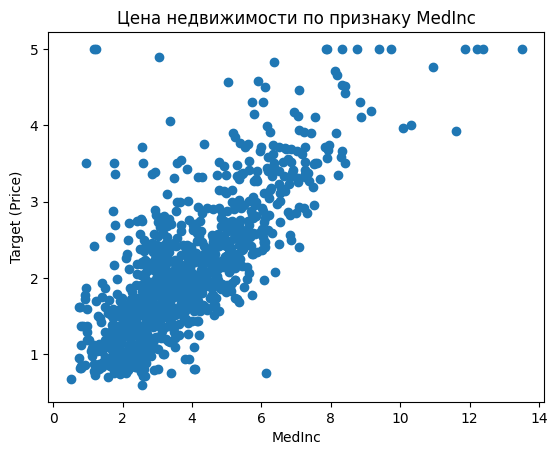

In [157]:
import matplotlib.pyplot as plt

plt.scatter(X['MedInc'], y)
plt.xlabel('MedInc')
plt.ylabel('Target (Price)')
plt.title('Цена недвижимости по признаку MedInc')
plt.show()


### 4. KNN из sklearn

#### 4.1. Разбейте данные на обучение и тест

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 4.2. Обучите модель KNN на 100 соседях


In [159]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100)

#### 4.3. Проверьте качество работы модели


In [160]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.2539907243501753
R^2 Score: 0.6506743704497873


#### 4.4. Возьмите один случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [161]:
import random

random_index = random.randint(0, X_test.shape[0] - 1)
x_random = X_test.iloc[random_index].values.reshape(1, -1)

distances, indices = knn.kneighbors(x_random)

print(f'Расстояния до ближайших соседей: {distances}')
print(f'Индексы ближайших соседей: {indices}')


Расстояния до ближайших соседей: [[0.0566 0.0725 0.0813 0.111  0.1228 0.1757 0.2226 0.2522 0.2662 0.2754
  0.278  0.295  0.301  0.3446 0.345  0.3471 0.3476 0.3536 0.3616 0.3756
  0.3899 0.5084 0.5213 0.5398 0.5454 0.5542 0.5561 0.5562 0.5935 0.5939
  0.619  0.6696 0.6904 0.7134 0.7142 0.7227 0.743  0.7519 0.7787 0.7877
  0.7886 0.79   0.7935 0.7978 0.8259 0.8511 0.8972 0.9282 0.9283 0.9632
  0.982  1.0825 1.0893 1.0896 1.0994 1.1015 1.111  1.1116 1.1367 1.1586
  1.215  1.2232 1.23   1.2486 1.2609 1.2676 1.2683 1.2737 1.2978 1.3192
  1.3531 1.3685 1.3931 1.4037 1.424  1.434  1.437  1.4517 1.456  1.4927
  1.5063 1.5087 1.5232 1.5286 1.5361 1.5421 1.5443 1.5444 1.5506 1.5536
  1.5609 1.5808 1.5916 1.6036 1.606  1.6261 1.6765 1.7162 1.728  1.7406]]
Индексы ближайших соседей: [[671 468  94 349 187 554 267 188 555 477 443 308 598 141 531 427 107  25
  586 371 520 210  70 582 395 602  11 780 667 654 593 647 715 129 134 770
  375 679 440 463 626 162  58 567 376  53 103 145 275 502 613 242 507 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 4.5. Выберите топ  k  соседей


In [162]:
top_k_neighbors = X_train.iloc[indices[0]]
top_k_labels = y_train[indices[0]]

print(f'Признаки ближайших соседей:\n{top_k_neighbors}')
print(f'Целевые значения ближайших соседей:\n{top_k_labels}')


Признаки ближайших соседей:
     MedInc
128  7.5544
421  7.5385
362  7.6923
126  7.5000
132  7.4882
..      ...
283  5.9849
960  5.9345
515  5.8948
519  5.8830
839  5.8704

[100 rows x 1 columns]
Целевые значения ближайших соседей:
[4.115   3.5     3.298   2.952   3.193   3.898   3.713   3.275   5.00001
 3.573   3.372   2.854   3.673   3.744   3.711   3.324   3.416   3.521
 3.365   3.911   2.919   4.716   4.462   2.93    3.901   4.125   3.314
 3.259   3.667   3.352   2.848   4.175   3.585   3.333   4.526   5.00001
 3.373   3.524   2.559   3.326   4.429   3.512   4.511   2.825   3.235
 3.56    3.686   3.709   3.137   3.334   3.524   3.004   2.737   3.115
 2.443   3.712   3.4     3.23    5.00001 2.969   2.085   4.305   3.422
 4.833   3.5     3.736   4.103   3.397   2.592   3.341   3.155   3.918
 3.053   2.825   3.404   2.629   3.588   3.44    3.986   0.75    2.782
 4.5     2.469   2.735   1.969   4.188   2.457   3.115   2.479   4.31
 2.542   2.873   2.923   2.365   2.639   3.71    2.596 

#### 4.6. Выведите финальное предсказание для этого объекта

In [163]:
predicted_value = np.mean(top_k_labels)
print(f'Финальное предсказание для выбранного объекта: {predicted_value}')

Финальное предсказание для выбранного объекта: 3.4041702999999996


#### 4.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [164]:
true_value = y_test[random_index]
print(f'Настоящее значение: {true_value}')
print(f'Предсказание модели sklearn: {y_pred[random_index]}')
print(f'Предсказание по среднему ближайших соседей: {predicted_value}')


Настоящее значение: 3.507
Предсказание модели sklearn: 3.4041702999999996
Предсказание по среднему ближайших соседей: 3.4041702999999996


#### 4.8 Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей

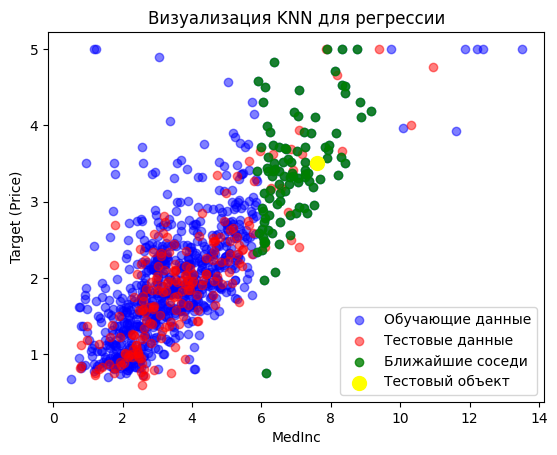

In [165]:
plt.scatter(X_train['MedInc'], y_train, color='blue', label='Обучающие данные', alpha=0.5)
plt.scatter(X_test['MedInc'], y_test, color='red', label='Тестовые данные', alpha=0.5)

plt.scatter(top_k_neighbors['MedInc'], top_k_labels, color='green', label='Ближайшие соседи', alpha=0.8)

plt.scatter(X_test.iloc[random_index]['MedInc'], y_test[random_index], color='yellow', s=100, label='Тестовый объект')

plt.xlabel('MedInc')
plt.ylabel('Target (Price)')
plt.legend()
plt.title('Визуализация KNN для регрессии')
plt.show()


### 5. Weighted KNN

#### 5.1. Обучите модель взвешенный KNN по дистанции

In [166]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X[['MedInc']], y, test_size=0.2, random_state=42)

knn_weighted = KNeighborsRegressor(n_neighbors=100, weights='distance')
knn_weighted.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 5.2. Проверьте качество работы модели


In [167]:
y_pred_weighted = knn_weighted.predict(X_test)
mse = mean_squared_error(y_test, y_pred_weighted)
print(f'MSE модели с взвешенными соседями: {mse}')


MSE модели с взвешенными соседями: 0.3078943245850838


#### 5.3. Возьмите тот же случайный тестовый объект и посчитайте для него расстояния до всех объектов с обучения

In [168]:
random_index = np.random.randint(0, X_test.shape[0])
test_point = X_test.iloc[random_index]

distances, indices = knn_weighted.kneighbors([test_point])

print(f'Расстояния до ближайших соседей: {distances}')
print(f'Индексы ближайших соседей: {indices}')


Расстояния до ближайших соседей: [[0.008  0.0259 0.0294 0.0413 0.0535 0.0596 0.0659 0.0663 0.0765 0.0786
  0.0968 0.0972 0.1068 0.1098 0.1122 0.1245 0.1288 0.1655 0.1686 0.1791
  0.1815 0.196  0.2014 0.2089 0.2156 0.2162 0.2171 0.2172 0.2234 0.2257
  0.2264 0.2278 0.2337 0.2376 0.2379 0.2447 0.2536 0.2644 0.2764 0.2788
  0.2989 0.3452 0.3493 0.364  0.389  0.3989 0.399  0.4008 0.4134 0.4242
  0.43   0.4456 0.4513 0.4516 0.4668 0.4687 0.4761 0.4859 0.5013 0.5259
  0.5294 0.5319 0.5338 0.5395 0.5485 0.5529 0.5599 0.5646 0.5753 0.5766
  0.5781 0.5842 0.608  0.6138 0.6407 0.6438 0.6439 0.6576 0.661  0.7041
  0.7082 0.7101 0.7137 0.7337 0.7377 0.7501 0.762  0.771  0.7711 0.773
  0.7838 0.7874 0.798  0.8004 0.8059 0.8268 0.8392 0.8479 0.8667 0.8849]]
Индексы ближайших соседей: [[369 136  37 160 405 526 494 292 701 172 245 469 263 196 382 662 218 227
  457 563 462 206 782  64 601 793 345 537 454 573 694 334 393 446 507 242
  421 401 599 279 432 613 305 502 429 275 145  56 652  71 103 471 355 4

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


#### 5.4. Выберите топ  k  соседей


In [169]:
top_k_neighbors = X_train.iloc[indices[0]]
print(f'Признаки ближайших соседей:\n{top_k_neighbors}')


Признаки ближайших соседей:
     MedInc
966  6.2918
706  6.2579
963  6.3132
423  6.2425
964  6.3373
..      ...
125  5.4570
279  5.4446
916  5.4359
413  5.4171
416  5.3989

[100 rows x 1 columns]


#### 5.5. Рассчитайте вес для каждого соседа

In [170]:
weights = 1 / distances[0]
print(f'Веса для ближайших соседей: {weights}')


Веса для ближайших соседей: [125.          38.61003861  34.01360544  24.21307506  18.69158879
  16.77852349  15.17450683  15.08295626  13.07189542  12.72264631
  10.33057851  10.28806584   9.36329588   9.10746812   8.91265597
   8.03212851   7.76397516   6.04229607   5.9311981    5.58347292
   5.50964187   5.10204082   4.9652433    4.78697942   4.63821892
   4.6253469    4.60617227   4.60405157   4.47627574   4.43066017
   4.41696113   4.38981563   4.27899016   4.20875421   4.20344683
   4.0866367    3.94321767   3.78214826   3.61794501   3.58680057
   3.34560054   2.89687138   2.86286859   2.74725275   2.57069409
   2.50689396   2.50626566   2.49500998   2.41896468   2.3573786
   2.3255814    2.24416517   2.21582096   2.21434898   2.14224507
   2.13356091   2.10039908   2.05803663   1.99481348   1.90150219
   1.88893087   1.88005264   1.87336081   1.85356812   1.82315406
   1.80864532   1.78603322   1.77116543   1.73822354   1.73430454
   1.72980453   1.71174255   1.64473684   1.62919

#### 5.6. Выведите финальное предсказание для этого объекта

In [171]:
weighted_prediction = np.dot(weights, y_train[indices[0]]) / np.sum(weights)
print(f'Финальное предсказание для объекта: {weighted_prediction}')


Финальное предсказание для объекта: 3.1971680514388856


#### 5.7. Сравните с настоящим целевым значением и предсказанием модели из `sklearn`

In [172]:
true_value = y_test[random_index]
print(f'Настоящее значение: {true_value}')
print(f'Предсказание модели sklearn: {y_pred_weighted[random_index]}')
print(f'Предсказание по среднему ближайших соседей: {weighted_prediction}')


Настоящее значение: 3.182
Предсказание модели sklearn: 3.197168051438885
Предсказание по среднему ближайших соседей: 3.1971680514388856


In [173]:
# Ваш код здесь


#### 5.8. Визуализируйте точки с обучения и тестовую с отрисовкой ближайших соседей по удаленности

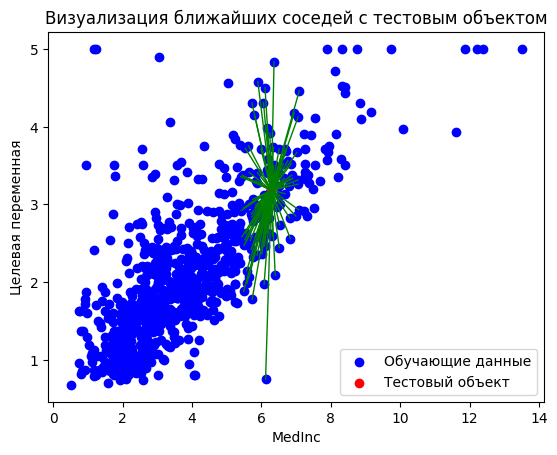

In [174]:
import matplotlib.pyplot as plt

plt.scatter(X_train['MedInc'], y_train, color='blue', label='Обучающие данные')

plt.scatter(test_point['MedInc'], true_value, color='red', label='Тестовый объект')

for i in range(len(indices[0])):
    plt.plot([test_point['MedInc'], X_train.iloc[indices[0][i]]['MedInc']],
             [true_value, y_train[indices[0][i]]],
             color='green', lw=1)

plt.legend()
plt.xlabel('MedInc')
plt.ylabel('Целевая переменная')
plt.title('Визуализация ближайших соседей с тестовым объектом')
plt.show()

## 6. Еще одна задача регрессии

### Получение данных

Будем работать с тем же самым набором данным `fetch_olivetti_faces` из `sklearn`, но уже для задачи регрессии - будем восстанавливать изображение.

In [175]:
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [176]:
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

Вот один пример обучающей пары.

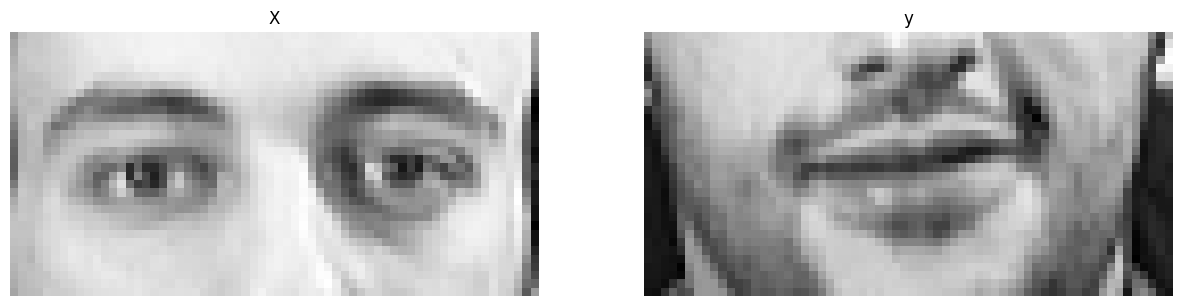

In [177]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

#### 6.1. Обучите модель KNN и назовите переменную с моделью knn на 100 соседях

In [178]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

#### 6.2. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом knn.


In [179]:
pred_test = {'knn': None,
             'weighted_knn': None,
             'weighted_knn_custom': None}

In [180]:
from sklearn.metrics import mean_squared_error
import numpy as np

knn_preds = knn.predict(X_test)

pred_test['knn'] = knn_preds

rmse_knn = np.sqrt(mean_squared_error(y_test, knn_preds))
print(f"RMSE для KNN: {rmse_knn}")

RMSE для KNN: 0.12627973227661488


#### 6.3. Обучите модель KNN с весами по дистанции и назовите переменную с моделью weighted_knn на 100 соседях

In [181]:
weighted_knn = KNeighborsRegressor(n_neighbors=100, weights='distance')
weighted_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

#### 6.4. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn.


In [182]:
weighted_knn_preds = weighted_knn.predict(X_test)

pred_test['weighted_knn'] = weighted_knn_preds

rmse_weighted_knn = np.sqrt(mean_squared_error(y_test, weighted_knn_preds))
print(f"RMSE для Weighted KNN: {rmse_weighted_knn}")


RMSE для Weighted KNN: 0.12370381888076908


#### 6.5. Напишите свою функцию подсчета весов по дистанции

(Можете выбрать любой подход)


In [183]:
def custom_weight(distances):
    return 1 / (distances + 1e-5)


#### 6.6. Обучите модель KNN с кастомными весами по дистанции и назовите переменную с моделью weighted_knn_custom на 100 соседях

In [184]:
weighted_knn_custom = KNeighborsRegressor(n_neighbors=100, weights=custom_weight)
weighted_knn_custom.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=100,
                    weights=<function custom_weight at 0x77fe94bd2200>)

#### 6.7. Проверьте качество работы модели

При этом предсказания модели запишите в словарь pred_test с ключом weighted_knn_custom.


In [185]:
weighted_knn_custom_preds = weighted_knn_custom.predict(X_test)

pred_test['weighted_knn_custom'] = weighted_knn_custom_preds

rmse_weighted_knn_custom = np.sqrt(mean_squared_error(y_test, weighted_knn_custom_preds))
print(f"RMSE для Custom Weighted KNN: {rmse_weighted_knn_custom}")


RMSE для Custom Weighted KNN: 0.1237038260486434


А сейчас отрисуем все предсказания.

In [186]:
ESTIMATORS = {'knn': knn,
              'weighted_knn': weighted_knn,
              'weighted_knn_custom': weighted_knn_custom}

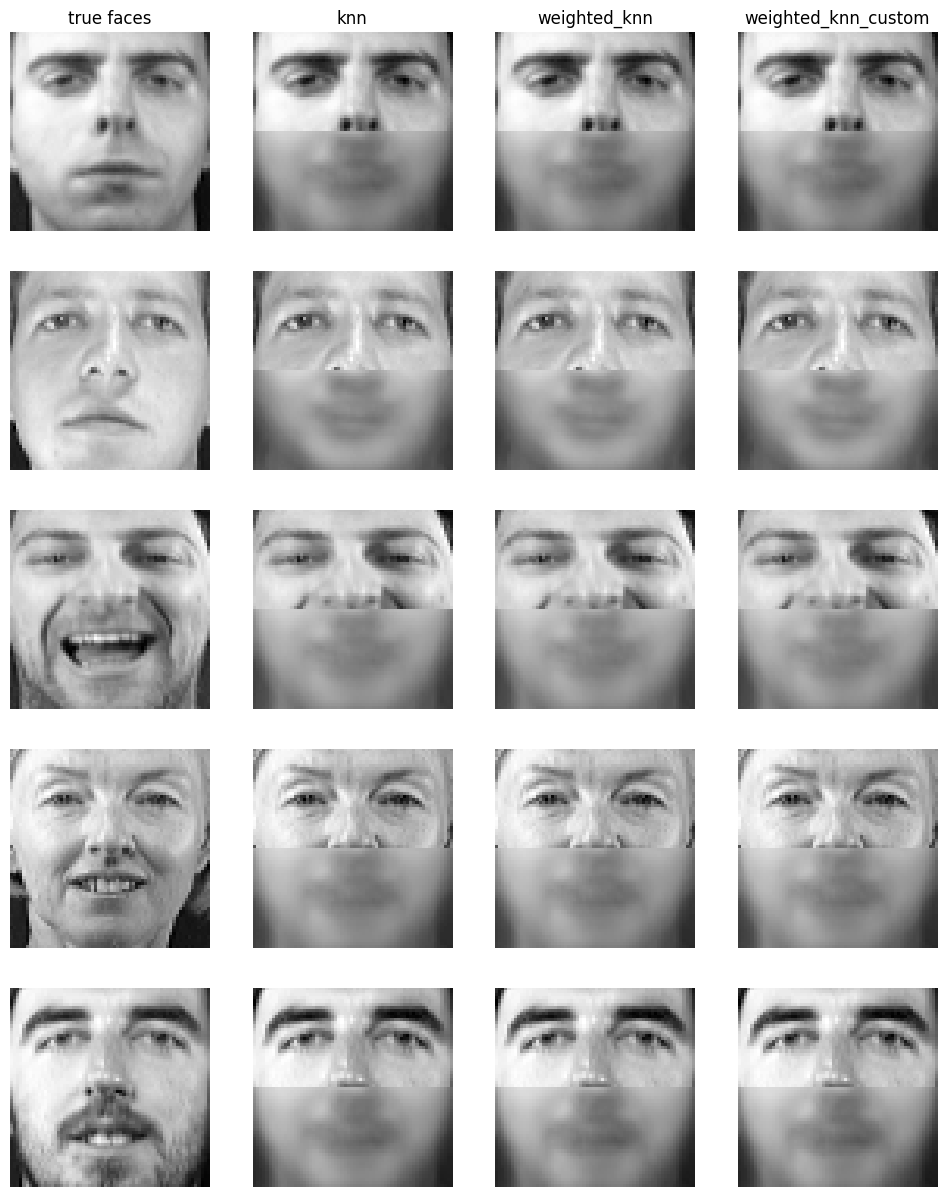

In [187]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))

for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

#### 7*. Подберите лучшие гиперпараметры для модели, используя метод [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html)

Примеры использования можно найти в технической документации, предыдущей работе, а также в следующих источниках:

[Пример 1](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/#vii_Model_fitting_with_K-cross_Validation_and_GridSearchCV)


[Пример 2](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv)

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    'n_neighbors': [5, 10, 20, 50, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

pred_test['best_knn'] = best_knn.predict(X_test)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


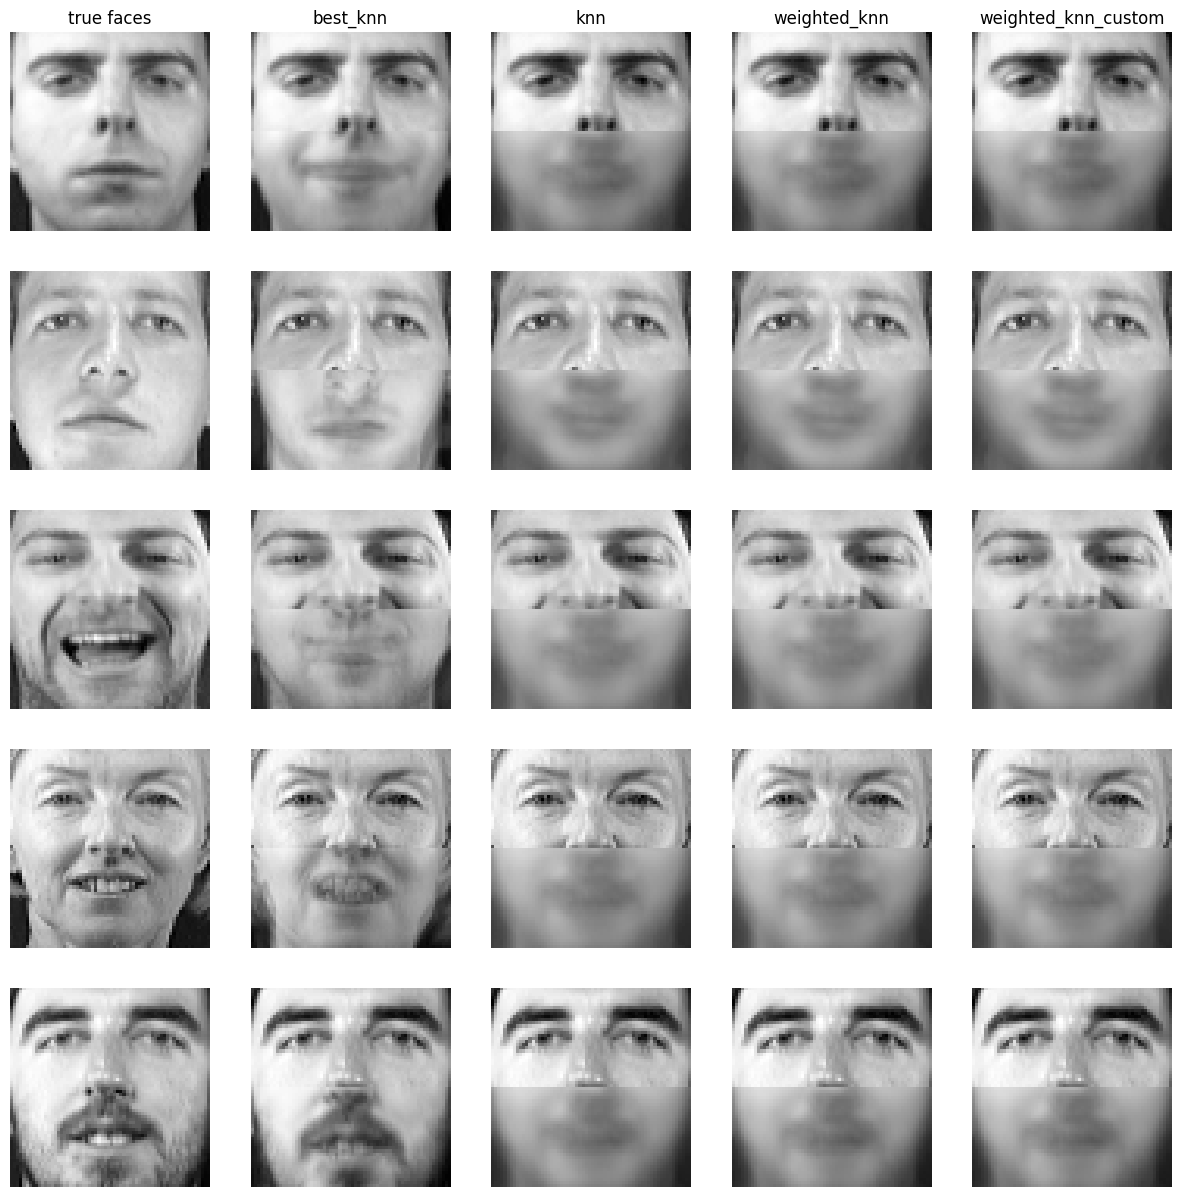

In [189]:
import matplotlib.pyplot as plt
import numpy as np

ESTIMATORS = {
    'knn': knn,
    'weighted_knn': weighted_knn,
    'weighted_knn_custom': weighted_knn_custom,
    'best_knn': best_knn
}

n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)

plt.figure(figsize=(3 * n_cols, 3 * n_faces))

for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)
        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest")

plt.show()
